In [256]:
from lyricsgenius import Genius
import re
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud
from string import punctuation

# Set up Genius API key and artist name
token = "UE498H-PVYkklJl02EC9NsocJuCiHZ32nrNhdXHlVb_BTVwtags81V7Y8OKCgX9P"
genius = Genius(token)
genius.remove_section_headers = True
genius.verbose = False
genius.skip_non_songs = True
genius.excluded_terms = ["(Remix)", "(Live)"]

userinput = input("Please enter the artist's name in Cyrillic!")
artist = genius.search_artist(userinput, max_songs=10)
lyrics = artist.save_lyrics(filename='artist.txt', extension='txt')

   


Please enter the artist's name in Cyrillic!Сплин
artist.txt already exists. Overwrite?
(y/n): y
Wrote artist.txt.


In [257]:
nlp = spacy.load('ru_core_news_sm')

with open('artist.txt', 'r') as inputfile:
    lyrwords = nlp(inputfile.read())
    
        
print(lyrwords.text)
    



7 ContributorsВыхода нет (No exit) Lyrics

Сколько лет прошло, всё о том же гудят провода
Всё того же ждут самолёты
Девочка с глазами из самого синего льда
Тает под огнём пулемета
Должен же растаять хоть кто-то

Скоро рассвет
Выхода нет
Ключ поверни - и полетели
Нужно вписать
В чью-то тетрадь
Кровью, как в метрополитене:
Выхода нет
Выхода нет

Где-то мы расстались - не помню в каких городах
Словно это было в похмелье
Через мои песни идут и идут поезда
Исчезая в тёмном тоннеле
Лишь бы мы проснулись в одной постели
You might also like
Скоро рассвет
Выхода нет
Ключ поверни - и полетели
Нужно вписать
В чью-то тетрадь
Кровью, как в метрополитене:
Выхода нет
Выхода нет

Сколько лет пройдёт, всё о том же гудеть проводам
Всё того же ждать самолётам
Девочка с глазами из самого синего льда
Тает под огнём пулемёта
Лишь бы мы проснулись с тобой в одной постели

Скоро рассвет
Выхода нет
Ключ поверни - и полетели
Нужно вписать
В чью-то тетрадь
Кровью, как в метрополитене:
Выхода нет
Выхода нет
Выход

In [258]:
#get only nouns, verbs, adjectives, adverbs
processed = [token for token in lyrwords if token.pos_ == "NOUN" or token.pos_ == "VERB" or token.pos_ == "ADJ" or token.pos_ == "ADV"]

print(processed)

[нет, лет, прошло, гудят, провода, ждут, самолёты, Девочка, глазами, самого, синего, льда, Тает, огнём, пулемета, Должен, растаять, хоть, Скоро, рассвет, нет, поверни, -, полетели, Нужно, вписать, тетрадь, Кровью, метрополитене, нет, нет, Где, -, то, расстались, помню, городах, похмелье, песни, идут, идут, поезда, тёмном, тоннеле, проснулись, постели, Скоро, рассвет, нет, поверни, -, полетели, Нужно, вписать, тетрадь, Кровью, метрополитене, нет, нет, лет, пройдёт, гудеть, проводам, ждать, самолётам, Девочка, глазами, самого, синего, льда, Тает, огнём, пулемёта, проснулись, постели, Скоро, рассвет, нет, поверни, -, полетели, Нужно, вписать, тетрадь, Кровью, метрополитене, нет, нет, нет, сердце, знали, лета, болтались, свету, земле, воде, совершенно, случайно, взяли, билеты, соседние, кресла, большой, высоте, сердце, остановилось, сердце, замерло, сердце, остановилось, сердце, замерло, ровно, тысячу, лет, просыпаемся, вместе, уснули, разных, местах, идём, ставить, кофе, сбежал, сердце, о

In [259]:
r_embed = re.compile('[а-яА-ЯёЁ0-9!?-]+(E|e)mbed|[a-zA-z0-9]+|л(а|я)|тра|на|х(э|е)й|х(и|е|у|а|ы|о)|а(и|у)|к(а|у)|-|[а-яА-ЯёЁ]{1}$')
embed_noise = []

for word in processed:
    if re.match(r_embed, word.text):
        embed_noise.append(str(word.text))
    
#token to list
token_list = [word.text for word in processed]
#print(token_list)
        
embed_filtered = list(filter(lambda x: x not in embed_noise, token_list))

print(embed_filtered)
        

     



               


['нет', 'лет', 'прошло', 'гудят', 'провода', 'ждут', 'самолёты', 'Девочка', 'глазами', 'самого', 'синего', 'льда', 'Тает', 'огнём', 'пулемета', 'Должен', 'растаять', 'Скоро', 'рассвет', 'нет', 'поверни', 'полетели', 'Нужно', 'вписать', 'тетрадь', 'Кровью', 'метрополитене', 'нет', 'нет', 'Где', 'то', 'расстались', 'помню', 'городах', 'похмелье', 'песни', 'идут', 'идут', 'поезда', 'тёмном', 'тоннеле', 'проснулись', 'постели', 'Скоро', 'рассвет', 'нет', 'поверни', 'полетели', 'Нужно', 'вписать', 'тетрадь', 'Кровью', 'метрополитене', 'нет', 'нет', 'лет', 'пройдёт', 'гудеть', 'проводам', 'ждать', 'самолётам', 'Девочка', 'глазами', 'самого', 'синего', 'льда', 'Тает', 'огнём', 'пулемёта', 'проснулись', 'постели', 'Скоро', 'рассвет', 'нет', 'поверни', 'полетели', 'Нужно', 'вписать', 'тетрадь', 'Кровью', 'метрополитене', 'нет', 'нет', 'нет', 'сердце', 'знали', 'лета', 'болтались', 'свету', 'земле', 'воде', 'совершенно', 'случайно', 'взяли', 'билеты', 'соседние', 'кресла', 'большой', 'высоте', '

In [264]:
#lemmatize
tokens = nlp(' '.join(embed_filtered))
lemmas = [token.lemma_ for token in tokens]

print(lemmas)

['нет', 'год', 'пройти', 'гудеть', 'провод', 'ждать', 'самолёты', 'девочка', 'глаз', 'самого', 'синий', 'лёд', 'таять', 'огнём', 'пулемёт', 'должный', 'растаять', 'Скоро', 'рассвет', 'нет', 'поверни', 'полететь', 'нужный', 'вписать', 'тетрадь', 'кровью', 'метрополитене', 'нет', 'нет', 'где', 'то', 'расстаться', 'помню', 'город', 'похмелие', 'песня', 'идти', 'идти', 'поезд', 'тёмном', 'тоннель', 'проснуться', 'постели', 'Скоро', 'рассвет', 'нет', 'поверни', 'полететь', 'нужный', 'вписать', 'тетрадь', 'кровью', 'метрополитене', 'нет', 'нет', 'год', 'пройти', 'гудеть', 'провод', 'ждать', 'самолёт', 'девочка', 'глаз', 'самого', 'синий', 'лёд', 'таять', 'огнём', 'пулемёта', 'проснуться', 'постели', 'Скоро', 'рассвет', 'нет', 'поверни', 'полететь', 'нужный', 'вписать', 'тетрадь', 'кровью', 'метрополитене', 'нет', 'нет', 'нет', 'сердце', 'знать', 'лето', 'болтаться', 'свет', 'земля', 'вода', 'совершенно', 'случайно', 'взять', 'билет', 'соседний', 'кресло', 'большой', 'высота', 'сердце', 'оста

In [269]:
#filtering stopwords:
rus_stop = stopwords.words("russian")
    #lowen all the words to gain clearer visibility
fin_lemmas = [word for word in lemmas if word not in rus_stop]

fin_lemmas2 = nlp(' '.join(fin_lemmas))

#result = [token.text for token in fin_lemmas2 if token.pos_ == "NOUN" or token.pos_ == "VERB" or token.pos_ == "ADJ" or token.pos_ == "ADV"]
    
print(fin_lemmas)



['год', 'пройти', 'гудеть', 'провод', 'ждать', 'самолёты', 'девочка', 'глаз', 'самого', 'синий', 'лёд', 'таять', 'огнём', 'пулемёт', 'должный', 'растаять', 'Скоро', 'рассвет', 'поверни', 'полететь', 'нужный', 'вписать', 'тетрадь', 'кровью', 'метрополитене', 'расстаться', 'помню', 'город', 'похмелие', 'песня', 'идти', 'идти', 'поезд', 'тёмном', 'тоннель', 'проснуться', 'постели', 'Скоро', 'рассвет', 'поверни', 'полететь', 'нужный', 'вписать', 'тетрадь', 'кровью', 'метрополитене', 'год', 'пройти', 'гудеть', 'провод', 'ждать', 'самолёт', 'девочка', 'глаз', 'самого', 'синий', 'лёд', 'таять', 'огнём', 'пулемёта', 'проснуться', 'постели', 'Скоро', 'рассвет', 'поверни', 'полететь', 'нужный', 'вписать', 'тетрадь', 'кровью', 'метрополитене', 'сердце', 'знать', 'лето', 'болтаться', 'свет', 'земля', 'вода', 'совершенно', 'случайно', 'взять', 'билет', 'соседний', 'кресло', 'большой', 'высота', 'сердце', 'остановиться', 'сердце', 'замереть', 'сердце', 'остановиться', 'сердце', 'замереть', 'ровно', 

In [270]:
word_freq = pd.Series(fin_lemmas).value_counts()
word_freq[:100]
    

сердце          22
забывай         12
устать          11
остановиться    10
любить          10
                ..
речь             2
король           2
душный           2
уйти             2
неснятый         2
Name: count, Length: 100, dtype: int64

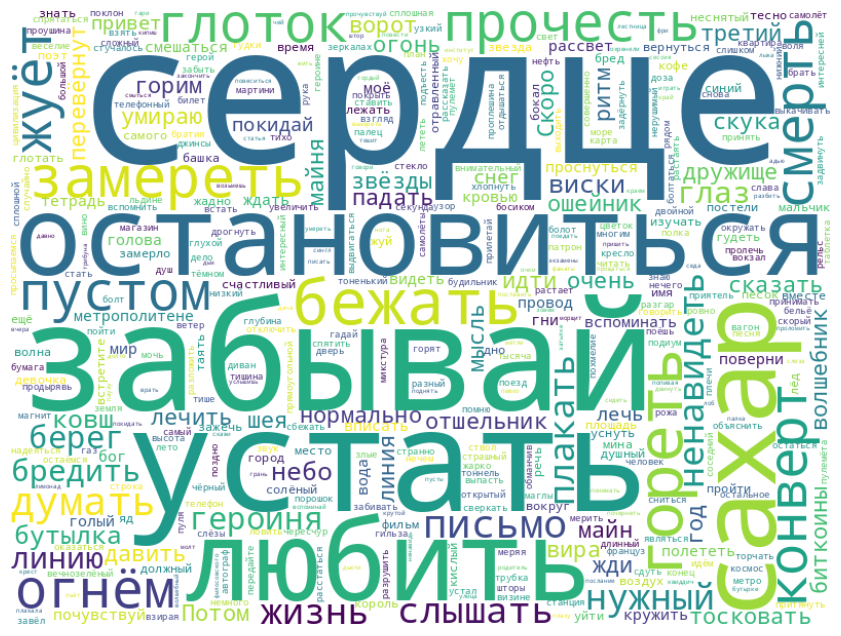

In [271]:
    #Generate word cloud
wc = WordCloud(width=800, height=600, max_words=2000, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()